# GRIPDEC21 @ The Sparks Foundation

# Author: Shivam Kumar

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# TASK 1 - PREDICION USING SUPERVISED ML

In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
print("Now our data is loaded")
df

Now our data is loaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

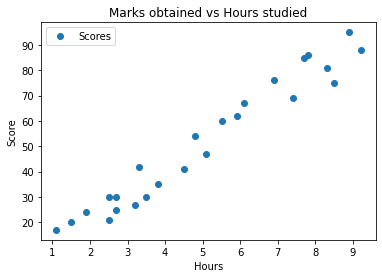

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Marks obtained vs Hours studied')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

Text(0.5, 1.0, 'Plotting the regresssion line')

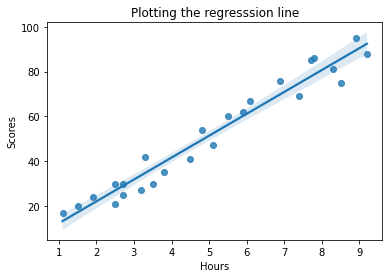

In [10]:
sns.regplot(x='Hours', y='Scores', data=df)
plt.title("Plotting the regresssion line")

# Predicting the score using eqn of best fit line

In [11]:
# collecting X and Y
X = df['Hours'].values
Y = df['Scores'].values

In [12]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
n = len(X)

#Using the formula to calculate b1(Slope) and b0(y-intercept)
num = 0
dem = 0
for i in range(n):
    num += (X[i]-mean_x)*(Y[i]-mean_y)
    dem += (X[i]-mean_x)**2
b1 = num/dem
b0 = mean_y-(b1*mean_x)

# Print coefficients
print(b1, b0)

9.775803390787475 2.4836734053731746


In [13]:
df["Predicted scores"] = b0 + b1*df["Hours"]

In [14]:
print(df)

    Hours  Scores  Predicted scores
0     2.5      21         26.923182
1     5.1      47         52.340271
2     3.2      27         33.766244
3     8.5      75         85.578002
4     3.5      30         36.698985
5     1.5      20         17.147378
6     9.2      88         92.421065
7     5.5      60         56.250592
8     8.3      81         83.622842
9     2.7      25         28.878343
10    7.7      85         77.757360
11    5.9      62         60.160913
12    4.5      41         46.474789
13    3.3      42         34.743825
14    1.1      17         13.237057
15    8.9      95         89.488324
16    2.5      30         26.923182
17    1.9      24         21.057700
18    6.1      67         62.116074
19    7.4      69         74.824618
20    2.7      30         28.878343
21    4.8      54         49.407530
22    3.8      35         39.631726
23    6.9      76         69.936717
24    7.8      86         78.734940


In [15]:
m = b0 + b1*9.25
print("Marks scored by the student studying 9.25 hours/day is ",m)

Marks scored by the student studying 9.25 hours/day is  92.90985477015732


In [16]:
df=df.drop(columns='Predicted scores')

# Predicting using Machine learning model

Preparing the data

The first step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [17]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


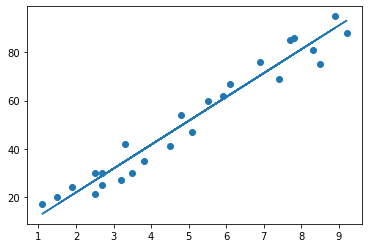

In [20]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions 

Now that we have trained our algorithm, it's time to make some predictions.

In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
# Predicting the model accuracy
print('Training accuracy: ',regressor.score(X_train,y_train))
print('Test accuracy: ',regressor.score(X_test,y_test))

Training accuracy:  0.9515510725211552
Test accuracy:  0.9454906892105356


In [24]:
# Testing our own data
hours = 9.25
pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model 

In [25]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error',metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error 21.5987693072174


We can see that there is no much difference between the predicted scores at 9.25 hours/day using equation of best fit line and machine learning model. They are almost same.
Predicted Score using Equation of best fit line = 92.90985477015732
Predicted Score using ML model= 93.69173248737538
We can increase the accuracy of prediction of ML model by increasing the number of data in training set.